In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Build a simple neural network model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [5]:
# Train the model using different optimizers
def train_model(optimizer, epochs=50, batch_size=None):
    model = build_model()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = None
    if batch_size:
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    else:
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
    
    # Evaluate the model on test set
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'\nOptimizer: {optimizer.get_config()["name"]}')
    print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')
    
    # Make predictions
    predictions = model.predict(X_test)
    print(predictions)
    
    # Plot training history
    plot_training_history(history, optimizer.get_config()["name"])

    # Plot ROC curve
    plot_roc_curve(y_test, predictions, optimizer.get_config()["name"])

In [6]:
# Plot training history
def plot_training_history(history, optimizer_name):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model Accuracy - {optimizer_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model Loss - {optimizer_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [7]:
# Plot ROC curve
def plot_roc_curve(y_true, y_pred, optimizer_name):
    from sklearn.metrics import roc_curve, auc

    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {optimizer_name}')
    plt.legend(loc='lower right')
    plt.show()

In [8]:
# Compare GD, SGD, and Mini-batch SGD
epochs = 50




7/7 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8400

Optimizer: SGD
Test Loss: 0.3811, Test Accuracy: 0.8400
7/7 [==============================] - 0s 1ms/step
[[0.5410264 ]
 [0.5986578 ]
 [0.41047108]
 [0.8015818 ]
 [0.9149743 ]
 [0.12103242]
 [0.3252217 ]
 [0.7513383 ]
 [0.68109155]
 [0.54480195]
 [0.8375783 ]
 [0.4757925 ]
 [0.01242458]
 [0.6039841 ]
 [0.71106637]
 [0.26686427]
 [0.11625571]
 [0.88363934]
 [0.7344024 ]
 [0.42971998]
 [0.95325905]
 [0.25654742]
 [0.11587868]
 [0.10559309]
 [0.9589286 ]
 [0.02060091]
 [0.997772  ]
 [0.84639883]
 [0.02670972]
 [0.96945065]
 [0.81409544]
 [0.9937968 ]
 [0.54132736]
 [0.15373774]
 [0.27596906]
 [0.30960104]
 [0.07996458]
 [0.5249973 ]
 [0.0536705 ]
 [0.4991545 ]
 [0.02882664]
 [0.8594583 ]
 [0.09023164]
 [0.30081436]
 [0.66311806]
 [0.02850462]
 [0.92110276]
 [0.01047099]
 [0.6895108 ]
 [0.9942137 ]
 [0.11911011]
 [0.16940312]
 [0.0268319 ]
 [0.9924596 ]
 [0.98852825]
 [0.6083267 ]
 [0.03445913]
 [0.07

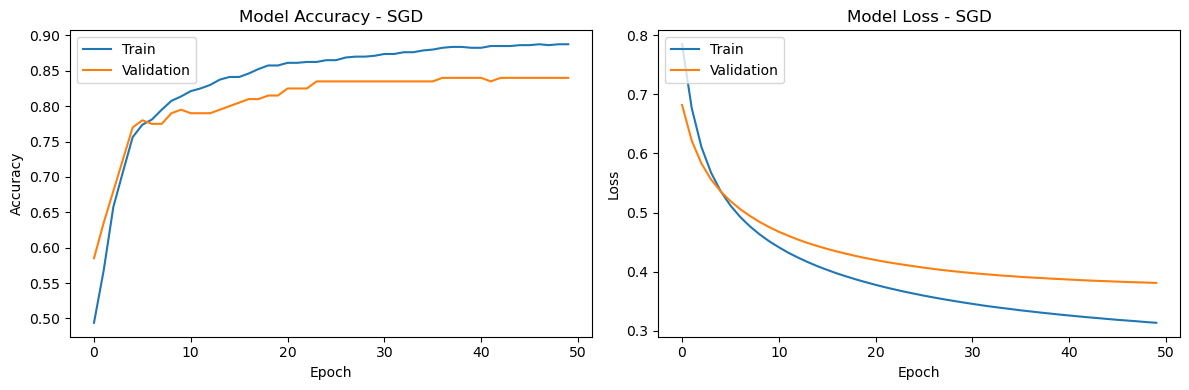

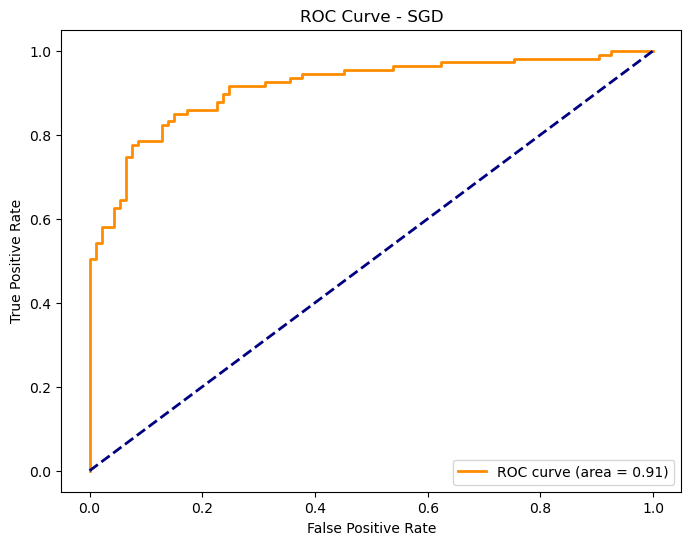

In [9]:
# Gradient Descent
gd_optimizer = optimizers.SGD(learning_rate=0.01)
train_model(gd_optimizer, epochs=epochs)

7/7 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8450

Optimizer: SGD
Test Loss: 0.3869, Test Accuracy: 0.8450
7/7 [==============================] - 0s 2ms/step
[[0.64012384]
 [0.69359255]
 [0.60758173]
 [0.82711715]
 [0.87752163]
 [0.13738824]
 [0.1468506 ]
 [0.69233006]
 [0.76432455]
 [0.3275304 ]
 [0.88407636]
 [0.54677314]
 [0.01561803]
 [0.33472908]
 [0.6268507 ]
 [0.2958612 ]
 [0.21403094]
 [0.85116994]
 [0.5993986 ]
 [0.3167461 ]
 [0.9621404 ]
 [0.16129601]
 [0.14459041]
 [0.10868466]
 [0.9826695 ]
 [0.02987726]
 [0.9974851 ]
 [0.9179599 ]
 [0.02327404]
 [0.9307554 ]
 [0.9126952 ]
 [0.9888426 ]
 [0.5904584 ]
 [0.20576602]
 [0.51819974]
 [0.23603493]
 [0.0798529 ]
 [0.41242605]
 [0.05094719]
 [0.34516504]
 [0.03607186]
 [0.8308459 ]
 [0.14665394]
 [0.41680872]
 [0.58197707]
 [0.01877948]
 [0.9631695 ]
 [0.01561003]
 [0.65588564]
 [0.9889772 ]
 [0.12109614]
 [0.12318689]
 [0.04238767]
 [0.9936471 ]
 [0.98021483]
 [0.4968505 ]
 [0.0253163 ]
 [0.07147

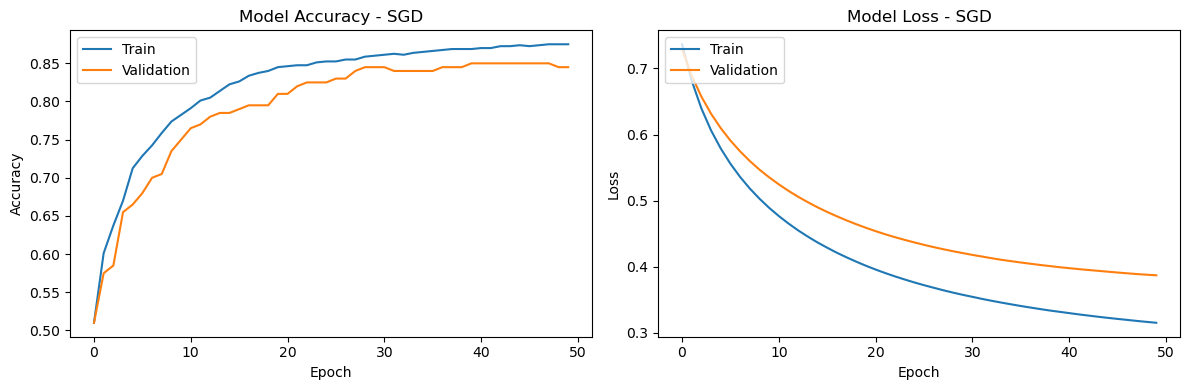

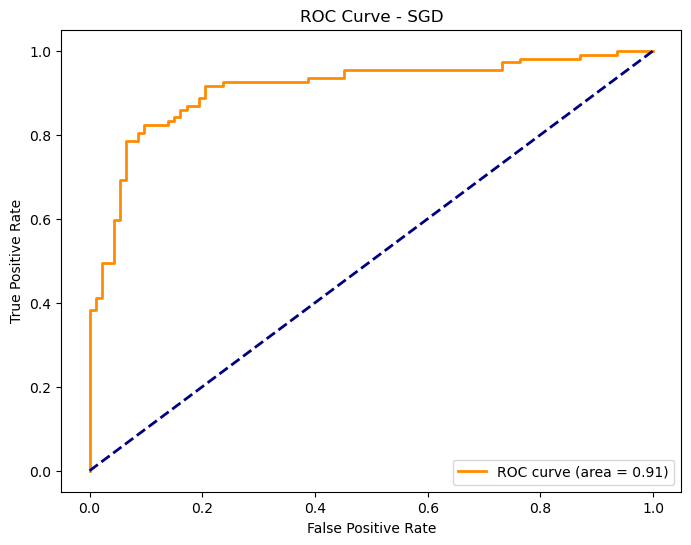

In [10]:
# Stochastic Gradient Descent
sgd_optimizer = optimizers.SGD(learning_rate=0.01)
train_model(sgd_optimizer, epochs=epochs)

7/7 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8650

Optimizer: SGD
Test Loss: 0.3659, Test Accuracy: 0.8650
7/7 [==============================] - 0s 2ms/step
[[0.53197426]
 [0.539128  ]
 [0.53609365]
 [0.8464222 ]
 [0.9429379 ]
 [0.08311282]
 [0.2989407 ]
 [0.81392455]
 [0.7766967 ]
 [0.21521527]
 [0.93408304]
 [0.6243607 ]
 [0.00857774]
 [0.41248727]
 [0.7241879 ]
 [0.26220626]
 [0.07772543]
 [0.8644888 ]
 [0.70205224]
 [0.39389354]
 [0.95209736]
 [0.27435437]
 [0.13090198]
 [0.18668912]
 [0.99134135]
 [0.03500029]
 [0.9948038 ]
 [0.89954257]
 [0.04342285]
 [0.9868351 ]
 [0.8361422 ]
 [0.98700625]
 [0.6029811 ]
 [0.10067394]
 [0.37119848]
 [0.22481506]
 [0.08217945]
 [0.3652606 ]
 [0.06257927]
 [0.56002593]
 [0.06199256]
 [0.80789757]
 [0.05398227]
 [0.3744083 ]
 [0.62622035]
 [0.0135306 ]
 [0.9791509 ]
 [0.02035346]
 [0.7715641 ]
 [0.9903331 ]
 [0.11192824]
 [0.12765756]
 [0.01525412]
 [0.982022  ]
 [0.9893253 ]
 [0.63718426]
 [0.00725375]
 [0.06923

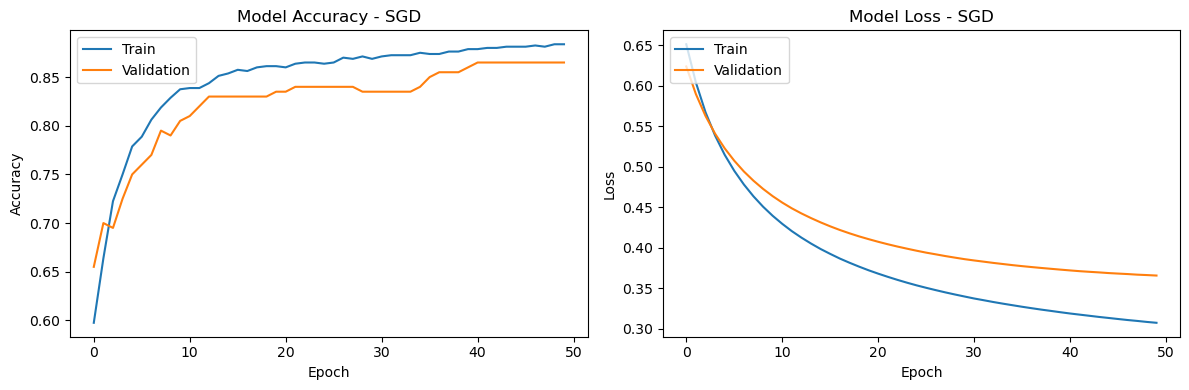

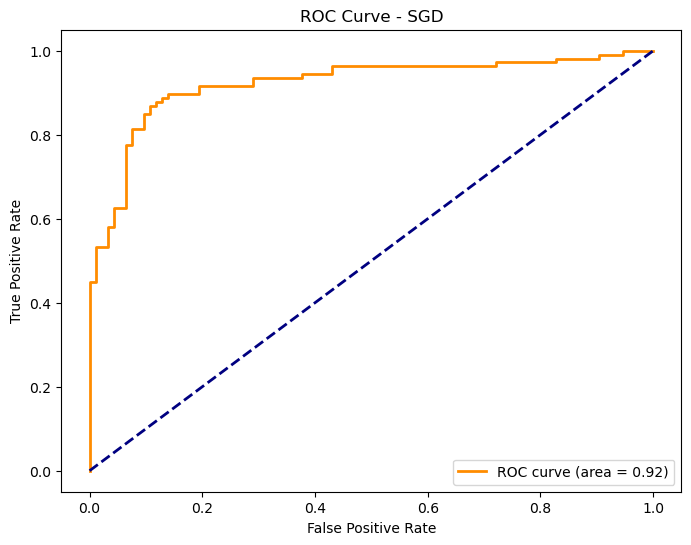

In [11]:
# Mini-batch Stochastic Gradient Descent
batch_size = 32
minibatch_sgd_optimizer = optimizers.SGD(learning_rate=0.01)
train_model(minibatch_sgd_optimizer, epochs=epochs, batch_size=batch_size)